### Unsupervised learning: clustering 
typical ingredient for exploratory data analysis
- goal: find groups (clusters) of datapoints that belong together


compactness: elements of same cluster close to each other

separability: different clusters should be clearly distinct

### Clustering: K-Nearest Neighbors
To determine k, try out a few values. Use part of the already labeled data and pretend its unknown and evaluate different k. Odd k avoids ties in voting. Low k can be noisy and subject to outliers. Large k can lead to clusters with few representatives being outvoted

#### Use KNN clustering
Goal: Implement and try a KNN clustering model

Steps
- Create clusters with scikit-learn make_blobs function
- Perform KNN clustering
- Determine a good value for k and explain your choice


In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
# here we set the style of the plots that will be shown below
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (8,6)
title_size=24

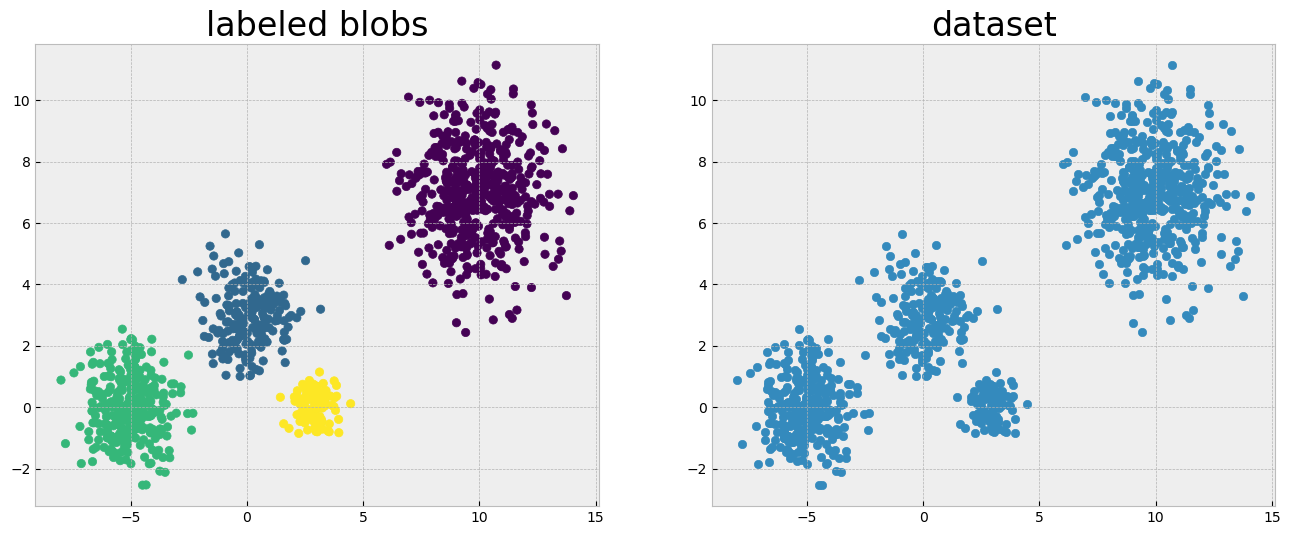

In [2]:
# We set a random_state to generate always the same Gaussian sampling.
random_state = 0
# The make_blobs function requires the centers, standard deviations and number of samples for each Gaussian to sample.
centers = [[10,7],[0,3],[-5,0],[3,0]]
n_samples = [500,200,300,100]
cluster_std=[1.5,1,1,0.5]
     
X_blobs, y_blobs = make_blobs(n_samples=n_samples,
                   random_state=random_state,
                   cluster_std=cluster_std,
                   centers=centers)

fig, axs = plt.subplots(1,2,figsize=[16,6])
axs[0].scatter(X_blobs[:,0],X_blobs[:,1],c=y_blobs)
axs[0].set_title('labeled blobs', size=title_size)
axs[1].scatter(X_blobs[:,0],X_blobs[:,1])
axs[1].set_title('dataset', size=title_size)

plt.show();

#### Use K means or DBSCAN clustering
Goal: Implement and try either a K means or a DBSCAN clustering model

Steps
- Create clusters with scikit-learn make_blobs function
- Perform clustering on ^
- Show your result


In [3]:
X_blobs, y_blobs = make_blobs(n_samples=n_samples,
                   random_state=random_state,
                   cluster_std=cluster_std,
                   centers=centers)

10  clusters were extracted.


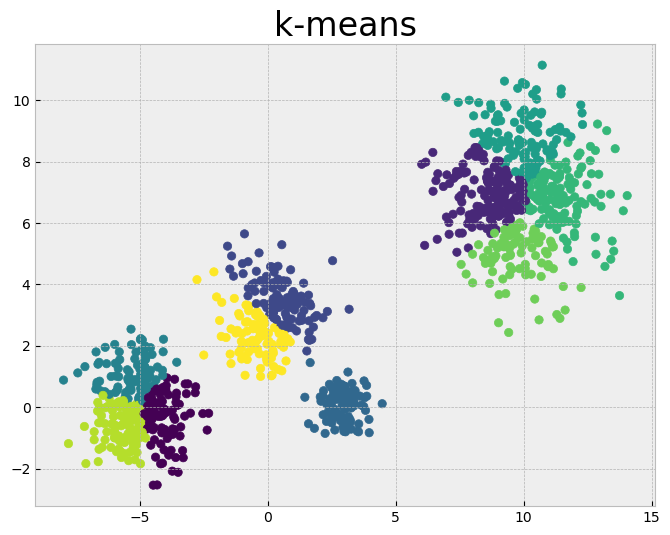

In [4]:
labels = KMeans(n_clusters=10).fit_predict(X_blobs)

print(np.max(labels)+1,' clusters were extracted.') 

plt.title('k-means', size=title_size)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=labels)

4  clusters were extracted.


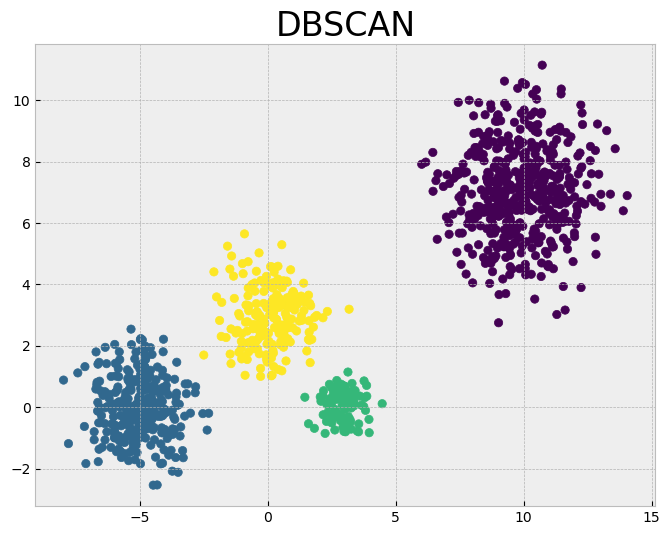

In [5]:
labels = DBSCAN(eps=1, min_samples=10).fit_predict(X_blobs)
print(np.max(labels)+1,' clusters were extracted.')
plt.title('DBSCAN', size=title_size)

plt.scatter(X_blobs[np.where(labels!=-1)][:,0],X_blobs[np.where(labels!=-1)][:,1],c=labels[np.where(labels!=-1)])

In [6]:
random_state = 0
centers = [[-2,10]]
n_samples = [50]
cluster_std=[[3,2]]
X_mixed, y_mixed = make_blobs(n_samples=n_samples,
                  random_state=random_state,
                  cluster_std=cluster_std,
                  centers=centers)
y_mixed = y_mixed + np.max(y_blobs) + 1
y_mixed = np.concatenate ([y_blobs,y_mixed])
X_mixed = np.concatenate([X_blobs,X_mixed])

4  clusters were extracted.


Text(0.5, 1.0, 'dataset')

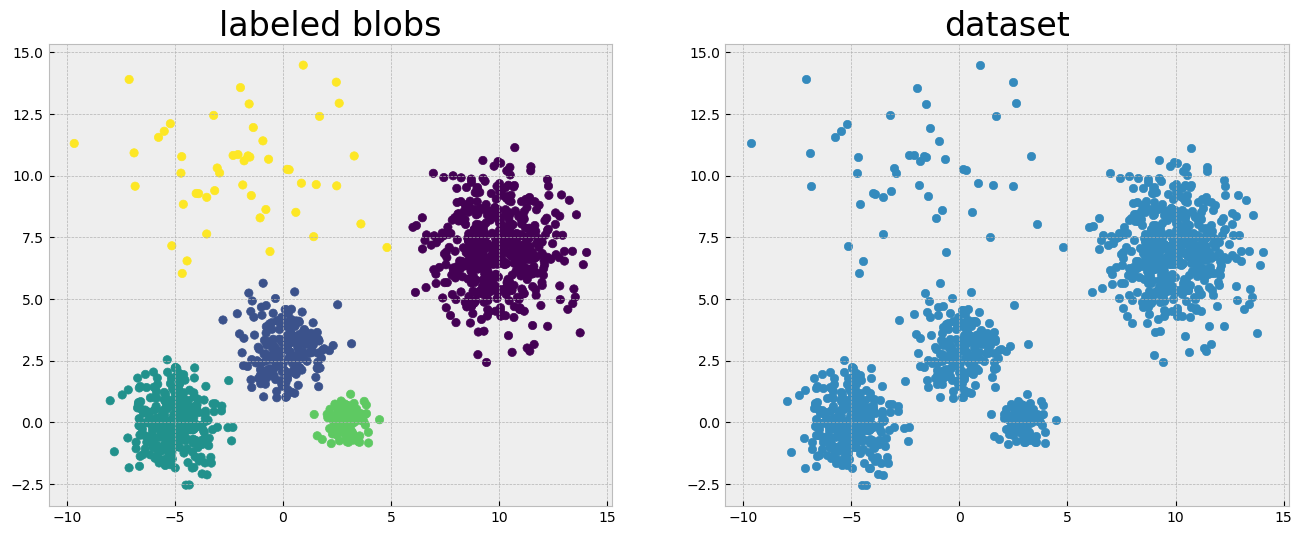

In [7]:
fig, axs = plt.subplots(1,2,figsize=[16,6])
print(np.max(labels)+1,' clusters were extracted.') 
axs[0].scatter(X_mixed[np.where(y_mixed!=-1)][:,0],X_mixed[np.where(y_mixed!=-1)][:,1],c=y_mixed[np.where(y_mixed!=-1)])
axs[0].set_title ('labeled blobs', size=title_size)
axs[1].scatter(X_mixed[:,0],X_mixed[:,1])
axs[1].set_title ('dataset', size=title_size)

4  clusters were extracted.


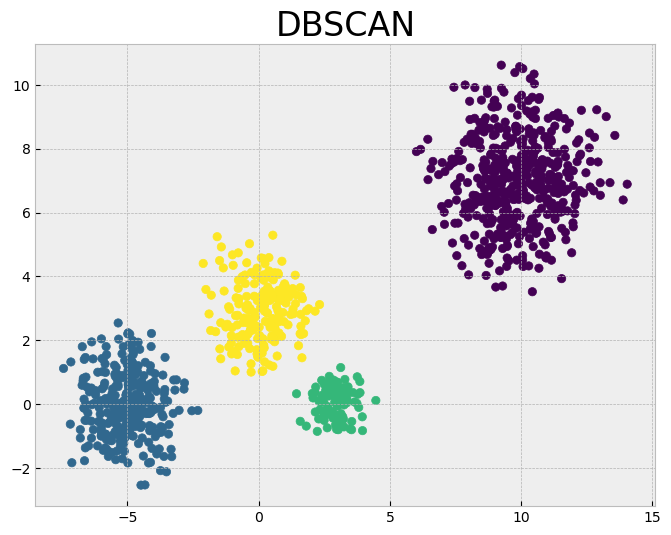

In [8]:
clustering = DBSCAN(eps=0.8, min_samples=8).fit(X_mixed)
labels = clustering.labels_
print(np.max(labels)+1,' clusters were extracted.') 
plt.title('DBSCAN', size=title_size)
plt.scatter(X_mixed[:,0][np.where(labels!=-1)],X_mixed[:,1][np.where(labels!=-1)],c=labels[np.where(labels!=-1)])

11  clusters were extracted.


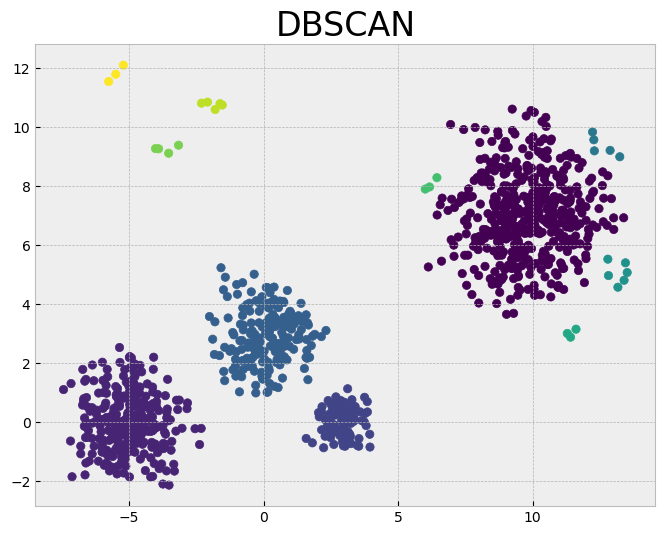

In [9]:
clustering = DBSCAN(eps=0.6, min_samples=3).fit(X_mixed)
plt.title('DBSCAN', size=title_size)
labels = clustering.labels_
print(np.max(labels)+1,' clusters were extracted.') 
plt.scatter(X_mixed[:,0][np.where(labels!=-1)],X_mixed[:,1][np.where(labels!=-1)],c=labels[np.where(labels!=-1)])

#### Perform PCA on the concrete dataset
Goal: Implement and try PCA

Steps
- Read the dataset
- Perform PCA with 1-8 descriptors
- Plot the total explained variance vs number of descriptors


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # within the scikit-learn module which focuses on
                                      # Machine Learning in Python, we import PCA decomposition algorithm
import seaborn as sns

In [11]:
df = pd.read_csv("./Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [12]:
target = df.csMPa.values
del df['csMPa']

In [13]:
X = df.values
X.shape

(1030, 8)

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [15]:
pca8 = PCA(n_components=8)            # applies PCA with the argument that we want a two-component fit
pca8.fit(X_scaled)                           # fits the PCA model with dataset X defined above
print(pca8)                          # this is only the PCA object!
X_pca8 = pca8.transform(X_scaled)

print('components: ' + str(pca8.components_))                 # each component defined by x-y pair
print('explained variance: ' + str(pca8.explained_variance_)) # how much variance each component explains 
                                                              # taking into consideration the entire dataset
print('cummulative explained variance: ' + str(round(sum(pca8.explained_variance_),3)))
print('ratio: ', sum(pca8.explained_variance_ratio_ * 100))

PCA(n_components=8)
components: [[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]
 [ 0.81420224 -0.17179437 -0.40822055 -0.21318975  0.23459653 -0.17408781
  -0.00456921  0.10052137]
 [-0.054297   -0.36269932  0.2267512   0.29606003 -0.03727351 -0.54580513
   0.38528206  0.52791909]
 [ 0.14820612 -0.02093167  0.54963115  0.07022191  0.35461841 -0.03308317
  -0.70123743  0.22801019]
 [-0.20314214  0.30488197 -0.1832672  -0.36597033  0.19329372  0.31455942
   0.09246568  0.743908  ]
 [ 0.22184381  0.22836331  0.35246257 -0.52427468 -0.66464314 -0.22684015
  -0.03902583  0.06936667]
 [ 0.44616267  0.43738376  0.38188581  0.38874117  0.05174995  0.34931986
   0.43336994  0.01288097]]
explained variance: [2.2823152  1.41745097 1.34138135 1.01514445 0.95243269 0.7909634
 0.17801452 0.03007197]
cummulative explained variance: 8.008
ratio:  99.

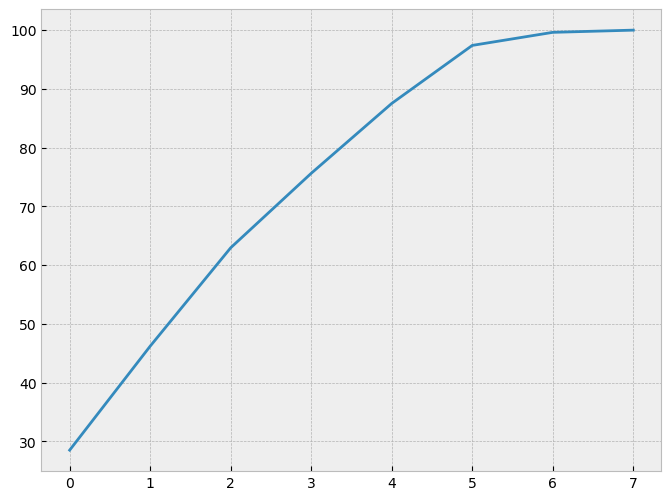

In [16]:
np.cumsum(pca8.explained_variance_ratio_ * 100)
plt.plot(np.cumsum(pca8.explained_variance_ratio_ * 100))

<AxesSubplot:>

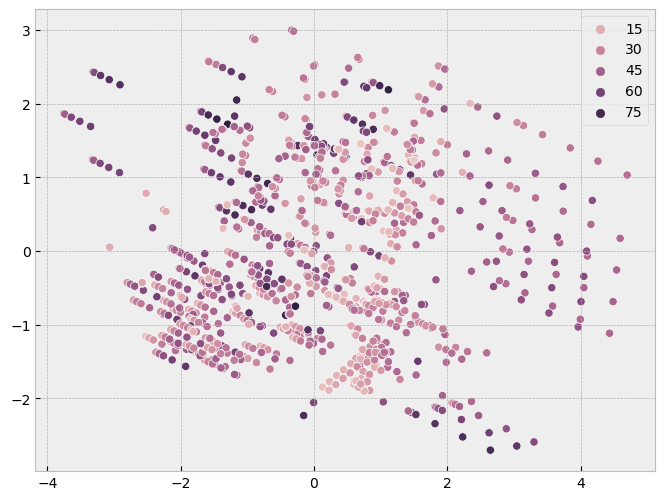

In [17]:
pca2 = PCA(n_components=2)            # applies PCA with the argument that we want a two-component fit
pca2.fit(X_scaled)                           # fits the PCA model with dataset X defined above
X_pca2 = pca2.transform(X_scaled)
sns.scatterplot(x=X_pca2[:,0],y=X_pca2[:,1],hue=target)

#### Build your own dataset from NOMAD
Goal: Create a dataset of at least 1000 and less than 10000 entries

Steps
- Decide on descriptors and target quantities on the website
- Use the API to download the data
- Collect it in a dataframe

In [18]:
import requests
import json

base_url = 'http://nomad-lab.eu/prod/v1/api/v1'

response = requests.post(
    f'{base_url}/entries/query',
    json={
        'query': {
            'results.material.elements': {
                'all': ['C', 'Br']
            }
        },
        'pagination': {
            'page_size': 1
        },
        'required': {
            "run": {
                "configuration": {
                    "energy": "energy_total"
                }
            }
        }
    })
response_json = response.json()
print(json.dumps(response.json(), indent=2))

{
  "owner": "public",
  "query": {
    "name": "results.material.elements",
    "value": {
      "all": [
        "C",
        "Br"
      ]
    }
  },
  "pagination": {
    "page_size": 1,
    "order_by": "entry_id",
    "order": "asc",
    "total": 56538,
    "next_page_after_value": "---FeRwUcGsiAnPTlh7682EHj_Qe"
  },
  "required": {},
  "data": [
    {
      "upload_id": "izLzrw0-TZiD8nPFwsBSCw",
      "references": [
        "http://cccbdb.nist.gov"
      ],
      "origin": "Russell Johnson",
      "quantities": [
        "",
        ".metadata",
        ".results",
        ".run",
        ".workflow",
        "metadata",
        "metadata.calc_hash",
        "metadata.calc_id",
        "metadata.coauthors",
        "metadata.datasets",
        "metadata.domain",
        "metadata.embargo_length",
        "metadata.entry_coauthors",
        "metadata.entry_create_time",
        "metadata.files",
        "metadata.last_processing_time",
        "metadata.license",
        "metadata

In [19]:
print(response_json['data'][0]['entry_id'])

---FeRwUcGsiAnPTlh7682EHj_Qe


In [20]:
response_json

{'owner': 'public',
 'query': {'name': 'results.material.elements', 'value': {'all': ['C', 'Br']}},
 'pagination': {'page_size': 1,
  'order_by': 'entry_id',
  'order': 'asc',
  'total': 56538,
  'next_page_after_value': '---FeRwUcGsiAnPTlh7682EHj_Qe'},
 'required': {},
 'data': [{'upload_id': 'izLzrw0-TZiD8nPFwsBSCw',
   'references': ['http://cccbdb.nist.gov'],
   'origin': 'Russell Johnson',
   'quantities': ['',
    '.metadata',
    '.results',
    '.run',
    '.workflow',
    'metadata',
    'metadata.calc_hash',
    'metadata.calc_id',
    'metadata.coauthors',
    'metadata.datasets',
    'metadata.domain',
    'metadata.embargo_length',
    'metadata.entry_coauthors',
    'metadata.entry_create_time',
    'metadata.files',
    'metadata.last_processing_time',
    'metadata.license',
    'metadata.main_author',
    'metadata.mainfile',
    'metadata.nomad_commit',
    'metadata.nomad_version',
    'metadata.optimade',
    'metadata.optimade.cartesian_site_positions',
    'metada

In [21]:
first_entry_id = response_json['data'][0]['entry_id']
response = requests.post(
    f'{base_url}/entries/{first_entry_id}/archive/query',
    json={
        'required': {
            'workflow': {
                'calculation_result_ref': {
                    'energy': '*',
                    'system_ref': {
                        'chemical_composition': '*'
                    }
                }
            }
        }
    })
response_json = response.json()
print(json.dumps(response_json, indent=2))

{
  "required": {
    "workflow": {
      "calculation_result_ref": {
        "energy": "*",
        "system_ref": {
          "chemical_composition": "*"
        }
      }
    }
  },
  "entry_id": "---FeRwUcGsiAnPTlh7682EHj_Qe",
  "data": {
    "entry_id": "---FeRwUcGsiAnPTlh7682EHj_Qe",
    "upload_id": "izLzrw0-TZiD8nPFwsBSCw",
    "parser_name": "parsers/gaussian",
    "archive": {
      "run": [
        null,
        {
          "system": [
            {}
          ],
          "calculation": [
            {
              "energy": {
                "total": {
                  "value": -1.4250453495524568e-14
                },
                "zero_point": {
                  "value": 5.987237427007107e-20
                }
              },
              "system_ref": "/run/1/system/0"
            }
          ]
        }
      ],
      "workflow": [
        {
          "calculation_result_ref": "/run/1/calculation/0"
        },
        {
          "calculation_result_ref": "/run

#### Perform SVM on the Binary Classification Dataset
Goal: Implement and try SVM

Steps
- Read the dataset
- Perform SVM using the polynomial kernel
- Optimize the d parameter using CV
- Try the RBF kernel 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC                                 # to build SVM 
from sklearn.model_selection import GridSearchCV            # for cross-validation
from sklearn.metrics import confusion_matrix                # to make a confusion matrix
from sklearn.metrics import plot_confusion_matrix           # to draw the confusion matrix

In [23]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_indices = np.arange(n)

np.random.shuffle(df_indices)

df_shuffled = df.iloc[df_indices]

In [84]:
df = pd.read_csv("./Concrete_Data_Yeh.csv")

df['goodconcrete']=(df.csMPa>50.0).astype(int)
del df['csMPa']

df_train = df_shuffled.iloc[:n_train].copy() 
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


<AxesSubplot:xlabel='goodconcrete', ylabel='Count'>

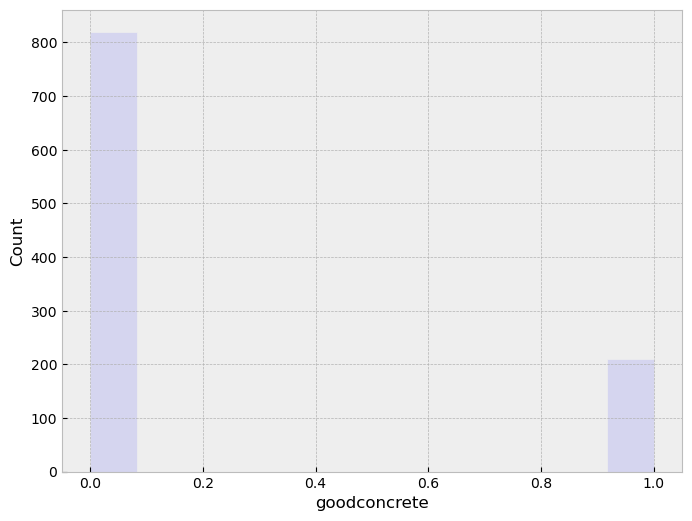

In [25]:
sns.histplot(df.goodconcrete, alpha=0.1)

In [26]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.goodconcrete.values
y_val = df_val.goodconcrete.values

del df_train['goodconcrete']
del df_val['goodconcrete']


In [27]:
df_train.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
44,427.5,47.5,0.0,228.0,0.0,932.0,594.0,90
585,290.2,193.5,0.0,185.7,0.0,998.2,704.3,28
371,218.9,0.0,124.1,158.5,11.3,1078.7,794.9,28
53,304.0,76.0,0.0,228.0,0.0,932.0,670.0,90
471,446.0,24.0,79.0,162.0,11.6,967.0,712.0,28


In [28]:
numerical = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
train_dict = df_train[numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [31]:
start_svm = SVC(random_state=2)
start_svm.fit(df_train, y_train)

SVC(random_state=2)

In [32]:
param_grid = [{'C': [0.1, 1, 10, 100, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001,], 
              'kernel': ['poly', 'rbf', 'sigmoid']}]

In [33]:
optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5,
                             scoring='accuracy',
                             verbose=0)

In [ ]:
optimal_params.fit(df_train, y_train)
print(optimal_params.best_params_)

#### Compute accuracy
Goal: Compute accuracy yourself

Steps
- Read the dataset
- Train model
- Compute accuracy for 0.5 threshold

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [44]:
val_dict = df_val[numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [45]:
model.predict(X_val)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
model.predict_proba(X_val)

array([[9.42517774e-01, 5.74822261e-02],
       [9.87828721e-01, 1.21712789e-02],
       [9.91724606e-01, 8.27539363e-03],
       [8.24016265e-01, 1.75983735e-01],
       [9.91050969e-01, 8.94903078e-03],
       [3.64628937e-01, 6.35371063e-01],
       [7.79546059e-01, 2.20453941e-01],
       [9.85742959e-01, 1.42570412e-02],
       [9.99229048e-01, 7.70951811e-04],
       [3.47768556e-01, 6.52231444e-01],
       [8.99356837e-01, 1.00643163e-01],
       [9.89271909e-01, 1.07280911e-02],
       [9.90064701e-01, 9.93529868e-03],
       [6.55576181e-01, 3.44423819e-01],
       [2.58987093e-01, 7.41012907e-01],
       [9.19704137e-01, 8.02958629e-02],
       [1.76319710e-01, 8.23680290e-01],
       [1.67959247e-01, 8.32040753e-01],
       [9.94699708e-01, 5.30029230e-03],
       [9.15495037e-01, 8.45049629e-02],
       [4.08475479e-01, 5.91524521e-01],
       [9.96436831e-01, 3.56316884e-03],
       [8.87835558e-01, 1.12164442e-01],
       [9.85468842e-01, 1.45311579e-02],
       [5.471961

In [48]:
from sklearn.metrics import accuracy_score


y_pred = model.predict_proba(X_val)[:, 1]
good = y_pred > 0.5
(y_val == good).mean()

accuracy_score(y_val, y_pred>0.5)

0.8308823529411765

#### Compute confusion matrix
Goal: Compute confusion matrix


/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


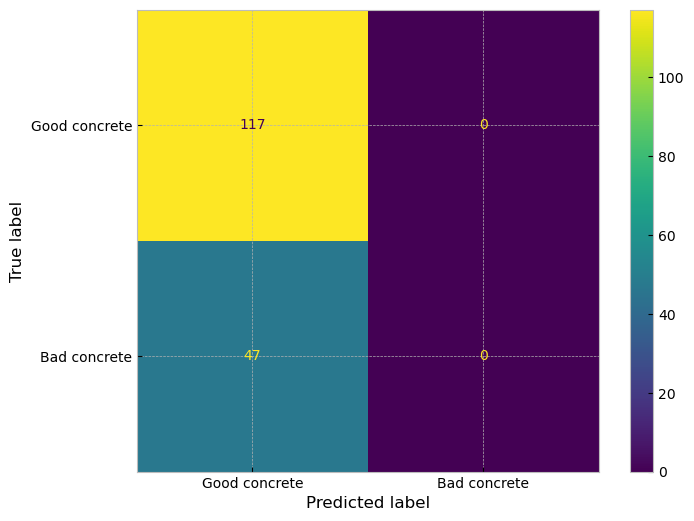

In [90]:
plot_confusion_matrix(start_svm,
                     df_val,
                     y_val,
                     values_format='d',
                     display_labels=['Good concrete', 'Bad concrete'])

In [49]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [50]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[190,  18],
       [ 28,  36]])

#### Compute precision and recall
Goal: Compute precision and recall


In [51]:
precision = tp / (tp + fp)
precision

0.6666666666666666

In [52]:
recall = tp / (tp + fn)
recall

0.5625

#### Implement ROC and AUC in python
Goal: Implement and compute ROC and AUC

Steps
- Read the dataset
- Perform classification
- Compute the ROC and AUC metrics


In [60]:
tpr = []
fpr = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

t = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in range(len(t)):
    predict_positive = (y_pred >= t[i])
    predict_negative = (y_pred < t[i])

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    tpr.append(tp / (fn + tp))
    fpr.append(fp / (tn + fp))


Text(0.5, 1.0, 'ROC')

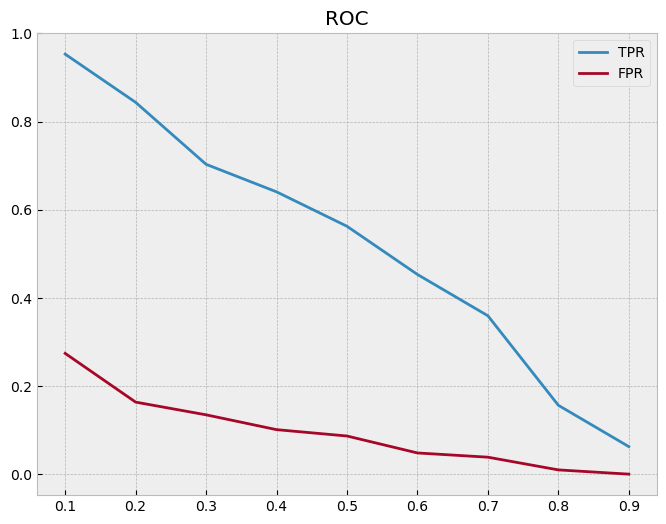

In [65]:
plt.plot(t, tpr, label = 'TPR')
plt.plot(t, fpr, label = 'FPR')
plt.legend()
plt.title('ROC')

Text(0, 0.5, 'TPR')

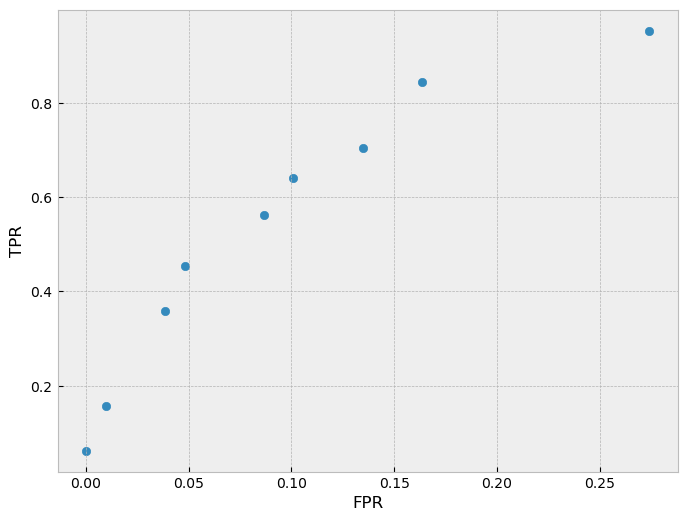

In [69]:
plt.scatter(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

#### Implement a GPR
Goal: Train a GPR using scikit-learn on the concrete dataset

Steps
- Read the dataset
- Train your regressor
- Characterize the accuracy and explain where you would need to measure next


In [108]:
df = pd.read_csv("./Concrete_Data_Yeh.csv")

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_indices = np.arange(n)
np.random.shuffle(df_indices)
df_shuffled = df.iloc[df_indices]

df_train = df_shuffled.iloc[:n_train].copy() 
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [109]:
y_train = df_train.csMPa.values
y_val = df_val.csMPa.values
y_test = df_test.csMPa.values

del df_train['csMPa']
del df_val['csMPa']
del df_test['csMPa']

In [71]:
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import RBF 

In [113]:
from sklearn import preprocessing

In [114]:
scaler = preprocessing.StandardScaler().fit(df_train)

In [115]:
df_scaled = scaler.transform(df_train)

In [116]:
my_kernel = RBF(length_scale = 1.0, length_scale_bounds = (1e-03, 1e03))
my_kernel.get_params()

{'length_scale': 1.0, 'length_scale_bounds': (0.001, 1000.0)}

In [117]:
gpr = GaussianProcessRegressor(kernel = my_kernel, random_state = 0)
gpr.fit(df_scaled, y_train)

# When the 'fit' method is called above, sklearn automatically optimizes the kernel hyperparameter
print("The optimal kernel found is", gpr.kernel_)
print("The optimal length scale = ", np.round(gpr.kernel_.get_params()['length_scale'], 3))

The optimal kernel found is RBF(length_scale=0.001)
The optimal length scale =  0.001


/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [111]:
mu, std = gpr.predict(df_test, return_std = True)

[]

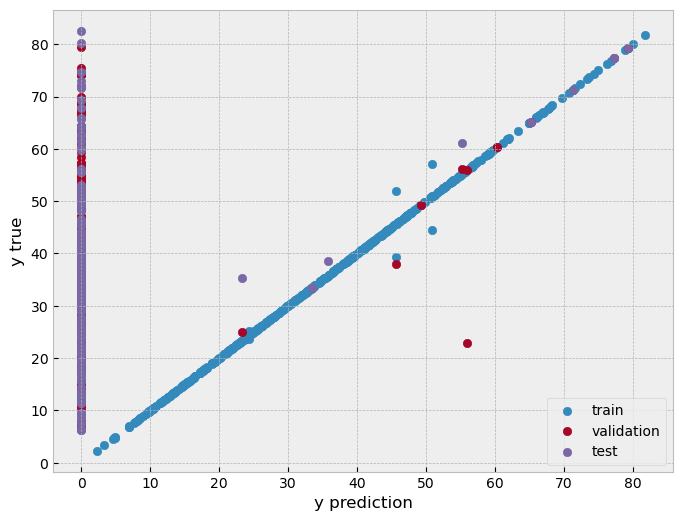

In [122]:
y_pred1 = gpr.predict(scaler.transform(df_train))
plt.scatter(y_pred1, y_train, label='train')

y_pred2 = gpr.predict(scaler.transform(df_val))
plt.scatter(y_pred2, y_val, label='validation')

y_pred3 = gpr.predict(scaler.transform(df_test))
plt.scatter(y_pred3, y_test, label='test')

plt.legend()
plt.xlabel('y prediction')
plt.ylabel('y true')
plt.plot()


In [124]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [126]:
rmse(y_pred3, y_test)

37.45275543028872

#### Implement a decision tree
Goal: Train a tree using scikit-learn on the concrete dataset

Steps
- Read the dataset
- Train your classifier
- Predict for validation dataset and compute AUC for training and validation dataset


In [131]:
from sklearn import tree

In [132]:
numerical=['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']

In [135]:
df['goodconcrete']=(df.csMPa>50.0).astype(int)
del df['csMPa']

df_train = df_shuffled.iloc[:n_train].copy() 
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.goodconcrete.values
y_val = df_val.goodconcrete.values

del df_train['goodconcrete']
del df_val['goodconcrete']

In [136]:
train_dict = df_train[numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)



In [137]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [138]:
val_dict = df_val[numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [143]:
y_pred = model.predict(X_val)

In [144]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_val, y_pred)
auc

0.8088942307692307

In [140]:
from sklearn.tree import export_text
print(export_text(model))

|--- feature_1 <= 357.50
|   |--- feature_0 <= 42.00
|   |   |--- feature_2 <= 1127.50
|   |   |   |--- feature_1 <= 319.50
|   |   |   |   |--- feature_7 <= 161.30
|   |   |   |   |   |--- feature_5 <= 54.20
|   |   |   |   |   |   |--- feature_1 <= 252.05
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  252.05
|   |   |   |   |   |   |   |--- feature_0 <= 15.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  15.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  54.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  161.30
|   |   |   |   |   |--- feature_1 <= 297.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  297.50
|   |   |   |   |   |   |--- feature_1 <= 297.90
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  297.90
|   |   |   |   |   |   |   |--- feature_5 <= 153.15
|   |   |  

In [147]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [142]:
print(export_text(model))

|--- feature_1 <= 357.50
|   |--- feature_0 <= 42.00
|   |   |--- feature_2 <= 1127.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  1127.50
|   |   |   |--- class: 1
|   |--- feature_0 >  42.00
|   |   |--- feature_6 <= 7.85
|   |   |   |--- class: 0
|   |   |--- feature_6 >  7.85
|   |   |   |--- class: 1
|--- feature_1 >  357.50
|   |--- feature_0 <= 21.00
|   |   |--- feature_1 <= 535.65
|   |   |   |--- class: 0
|   |   |--- feature_1 >  535.65
|   |   |   |--- class: 1
|   |--- feature_0 >  21.00
|   |   |--- feature_7 <= 183.05
|   |   |   |--- class: 1
|   |   |--- feature_7 >  183.05
|   |   |   |--- class: 0



#### Implement a random forest
Goal: Train a forest using scikit-learn on the concrete dataset

Steps
- Read the dataset
- Train your classifier
- Predict for validation dataset and compute AUC for training and validation dataset as a function of number of trees


In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf = RandomForestClassifier(n_estimators=15, random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15, random_state=1)

In [152]:
y_pred = rf.predict_proba(X_val)[:,1]

In [153]:
roc_auc_score(y_val,y_pred)

0.9536132812500001

#### Implement gradient boosting
Goal: Train a forest using scikit-learn and xgboost on the concrete dataset

Steps
- Read the dataset
- Train your classifier and analyze parameters
- Compute AUC score for different paraments


In [154]:
rf.predict_proba(X_val[[0]])

array([[1., 0.]])

In [156]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.2 MB/s eta 0:00:0000:0100:01


In [157]:
import xgboost as xgb

In [158]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [159]:
xgb_params ={
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight' : 1,
    
    'objective' : 'binary:logistic',
    'nthread' : 8,
    
    'seed':1,
    'verbosity': 1,
}

In [160]:
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [161]:
y_pred = model.predict(dval)

In [162]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.9738957331730769